In [1]:
import requests
import pandas as pd
import numpy as np

In [17]:
from datetime import date

today = date.today().strftime("%m-%d-%y")

In [2]:
def norm(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))*10

# Get top 50 collections (by market_cap)

In [3]:
url = "https://data-api.nftgo.io/eth/v1/market/rank/collection/7d?by=market_cap&with_rarity=false&asc=false&offset=0&limit=50"

headers = {
    "accept": "application/json",
    "X-API-KEY": "a40699f8-2225-4b50-a48d-178b6a71d15e",
}
params = {
    "time_range" : "7d",
    "by":"market_cap",
    "asc" : "false",
    "limit" : 50
}

ranked_collection = requests.get(url, headers=headers,params=params)
ranked_collection_json = ranked_collection.json()

In [4]:
collections_name  = [i['name'] for i in ranked_collection_json['collections']]
contract_addresses  = [i['contracts'][0] for i in ranked_collection_json['collections']]

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [37]:
datapath = '/content/drive/MyDrive/Risk Assessment'

In [38]:
# import json
# with open(f"{datapath}/top50_collection_name_{today}.json", "w") as fp:
#   json.dump(collections_name, fp)

# with open(f"{datapath}/top50_contract_addresses_{today}.json", "w") as fp:
#   json.dump(collections_name, fp)

date = today
with open(f"{datapath}/top50_collection_name_{date}.json", "r") as fp:
  collections_name = json.load(fp)

with open(f"{datapath}/top50_contract_addresses_{date}.json", "r") as fp:
  contract_addresses = json.load(fp)

# Get metrics by contract address

In [20]:

def pull_metrics(contract_address):
  url = f"https://data-api.nftgo.io/eth/v2/collection/{contract_address}/metrics"

  headers = {
      "accept": "application/json",
      "X-API-KEY": "a40699f8-2225-4b50-a48d-178b6a71d15e"
  }

  metrics = requests.get(url, headers=headers).json()
  return metrics



In [21]:
metrics_list=[]
for i in range(len(contract_addresses)):
  print(collections_name[i])
  metrics_list.append(pull_metrics(contract_addresses[i]))

with open(f"{datapath}/metrics_list_{today}.json", "w") as fp:
  json.dump(metrics_list, fp)

CryptoPunks
Bored Ape Yacht Club
Art Blocks
Mutant Ape Yacht Club
Pudgy Penguins
Azuki
ENS: Ethereum Name Service
Wrapped Cryptopunks
The Sandbox
The Captainz
Neo Tokyo Citizens
Decentraland
DeGods
Otherdeed for Otherside
CLONE X - X TAKASHI MURAKAMI
Meebits
Milady Maker
HYTOPIA Worlds
Otherdeed Expanded
Doodles Original Collection
Creepz by OVERLORD
Mocaverse
Moonbirds
OnChainMonkey
Otherside Koda
CryptoPunks V1 (wrapped)
The Potatoz
CryptoKitties
Bored Ape Kennel Club
Wolf Game Legacy
VeeFriends
Frowns
Terraforms by Mathcastles
Autoglyphs
Lil Pudgys
CNP / CryptoNinja Partners
Pixelmon - Generation 1
You Are The Champion
Live Like A Cat -neko no youni ikiru-
Cool Cats
World of Women
The Grapes
DigiDaigaku Genesis
Azuki Elementals
Neo Tokyo Outer Citizens
Parallel Avatars
Matr1x 2061
FLUF World
Axie Infinity
Urbit ID


In [39]:

date = today
with open(f"{datapath}/metrics_list_{date}.json", "r") as fp:
  metrics_list = json.load(fp)

In [40]:
metrics_list['contracts']

{'contracts': ['0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb'],
 'liquidity': {'24h': 0.000606366851945427,
  '7d': 0.0026275896917635167,
  '30d': 0.02385042950985346},
 'collection': {'blockchain': 'ETH',
  'name': 'CryptoPunks',
  'slug': 'cryptopunks',
  'description': "The CryptoPunks are 10,000 uniquely generated characters. No two are exactly alike, and each one of them can be officially owned by a single person on the Ethereum blockchain. Originally, they could be claimed for free by anybody with an Ethereum wallet, but all 10,000 were quickly claimed. Now they must be purchased from someone via the marketplace that's also embedded in the blockchain.",
  'logo': 'https://i.seadn.io/gae/BdxvLseXcfl57BiuQcQYdJ64v-aI8din7WPk0Pgo3qQFhAUH-B6i-dCqqc_mCkRIzULmwzwecnohLhrcH8A9mpWIZqA7ygc52Sr81hE?w=500&auto=format',
  'contracts': ['0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb'],
  'categories': ['PFP'],
  'collection_id': '6113f83a3126bb611b9b117c',
  'opensea_slug': 'cryptopunks',
  'offi

In [41]:
metrics_df = pd.json_normalize(metrics_list)

In [42]:
metrics_df

,contracts,collection_id,collection_name,collection_slug,opensea_slug,circulating_supply,total_supply,total_num,market_cap_usd,market_cap_eth,...,transfer_num.30d,buyer_num.24h,buyer_num.7d,buyer_num.30d,seller_num.24h,seller_num.7d,seller_num.30d,trader_num.24h,trader_num.7d,trader_num.30d
0,[0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb],6113f83a3126bb611b9b117c,CryptoPunks,cryptopunks,cryptopunks,9995,10000,10000,1.199267e+09,591704.000000,...,383,4,15,123,4,21,144,8,35,237
1,[0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d],6113f83c3126bb611b9b119d,Bored Ape Yacht Club,bored-ape-yacht-club,boredapeyachtclub,9998,10000,10000,6.146924e+08,296340.720000,...,6923,22,132,389,21,129,326,30,182,533
2,"[0x99a9b7c1116f9ceeb1652de04d5969cce509b069, 0...",6113f8443126bb611b9b11fd,Art Blocks,art-blocks,art-blocks,233131,233160,233160,3.324082e+08,162956.366020,...,4959,121,460,1337,224,627,1674,322,972,2479
3,[0x60e4d786628fea6478f785a6d7e704777c86a7c6],6130c104e355227cf5b463a6,Mutant Ape Yacht Club,mutant-ape-yacht-club,mutant-ape-yacht-club,19485,19486,19486,2.285535e+08,110674.800000,...,7518,54,287,904,36,227,735,71,375,1242
4,[0xbd3531da5cf5857e7cfaa92426877b022e612cf8],6125b9851722e60a4a7f8648,Pudgy Penguins,pudgy-penguins,pudgypenguins,8888,8888,8888,1.339146e+08,66100.056000,...,3299,74,204,441,73,189,436,125,307,676
5,[0xed5af388653567af2f388e6224dc7c4b3241c544],61df623f786ee17194db7c7b,Azuki,azuki,azuki,10000,10000,10000,1.241076e+08,60500.000000,...,3117,63,172,463,36,159,409,73,239,634
6,"[0xd4416b13d2b3a9abae7acd5d6c2bbdbe25686401, 0...",6113f8463126bb611b9b1212,ENS: Ethereum Name Service,ens-ethereum-name-service,ens,3408902,3699237,3414573,1.191301e+08,57866.403700,...,60946,58,445,1363,67,359,832,115,764,2071
7,[0xb7f7f6c52f2e2fdb1963eab30438024864c313f6],61a7a64c5e64ff73d2a1353a,Wrapped Cryptopunks,wrapped-cryptopunks,wrapped-cryptopunks,831,4376,2558,9.567894e+07,47227.000000,...,422,2,5,27,2,5,25,4,10,41
8,"[0x50f5474724e0ee42d9a4e711ccfb275809fd6d4a, 0...",6113f8383126bb611b9b1167,The Sandbox,the-sandbox-land,sandbox,223642,223645,223645,8.871326e+07,49787.148479,...,1381,10,66,288,10,48,163,18,104,416
9,[0x769272677fab02575e84945f03eca517acc544cc],63b9762a505930002f5a2287,The Captainz,the-captainz,thecaptainz,9999,9999,9999,8.504009e+07,41485.851000,...,2111,18,93,1031,18,74,760,33,145,1390


In [43]:
metrics_df.columns

Index(['contracts', 'collection_id', 'collection_name', 'collection_slug',
       'opensea_slug', 'circulating_supply', 'total_supply', 'total_num',
       'market_cap_usd', 'market_cap_eth', 'market_cap_usd_rank',
       'market_cap_eth_rank', 'holder_num', 'listing_num', 'liquidity.24h',
       'liquidity.7d', 'liquidity.30d', 'collection.blockchain',
       'collection.name', 'collection.slug', 'collection.description',
       'collection.logo', 'collection.contracts', 'collection.categories',
       'collection.collection_id', 'collection.opensea_slug',
       'collection.official_website_url', 'collection.opensea_url',
       'collection.banner_image_url', 'collection.discord_url',
       'collection.instagram_url', 'collection.twitter_url',
       'collection.telegram_url', 'collection.has_rarity',
       'collection.contract_type', 'floor_price.value', 'floor_price.usd',
       'floor_price.raw_value', 'floor_price.payment_token.address',
       'floor_price.payment_token.symbol

To quantify the risk of NFT collection. We'll use a scale of 1 to 10, where 1 indicates the lowest risk and 10 indicates the highest risk.

#Market Volatility

- **Formula**: Volatility Score = $\frac{\text{Absolute Value (Average of 24h, 7d, 30d floor price change percentages)}}{\text{Max volatility threshold}} \times 10$
- **Calculation**: Assuming a max volatility threshold of 20% (for example), and average floor price change percentage = $ \frac{|-0.97| + |8.04| + |5.03|}{3} \approx 4.68\% $
  - Volatility Score = $ \frac{4.68}{20} \times 10 = 2.34 $
  - Here we use the 95th percentile of top 50 collection
- **Score**: Approximately `2.34/10`



In [44]:
def cal_volatility(floor_price_change_list,max_thre=34):
  #remove nan
  nan_mask = np.isnan(floor_price_change_list)
  floor_price_change_list = np.array(floor_price_change_list)[~nan_mask].tolist()
  avg_volatility = np.mean([abs(s*100) for s in floor_price_change_list])
  volatility_score = avg_volatility / max_thre * 10
  return avg_volatility,volatility_score


In [45]:
volatility_df = metrics_df[['collection_name','floor_price_change_percentage.24h','floor_price_change_percentage.7d','floor_price_change_percentage.30d']]
volatility_df['avg'] = np.zeros(50)
volatility_df['score'] = np.zeros(50)
for i in range(volatility_df.shape[0]):
  avg,score = cal_volatility(volatility_df.iloc[i,1:4].tolist())
  volatility_df.iloc[i,4]=avg
  volatility_df.iloc[i,5]=score


from sklearn.preprocessing import PowerTransformer, QuantileTransformer
qt = QuantileTransformer(n_quantiles=40, output_distribution='normal')
x = volatility_df['score'][~np.isnan(volatility_df['score'])]
array = np.array(x).reshape(-1, 1)
volatility_df['trans_score'] =volatility_df['score']
volatility_df['trans_score'][~np.isnan(volatility_df['score'])]=[i[0] for i in norm(qt.fit_transform(array)).tolist()]


volatility_df


<ipython-input-45-41a8eff38ef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volatility_df['avg'] = np.zeros(50)
<ipython-input-45-41a8eff38ef1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volatility_df['score'] = np.zeros(50)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in dou

,collection_name,floor_price_change_percentage.24h,floor_price_change_percentage.7d,floor_price_change_percentage.30d,avg,score,trans_score
0,CryptoPunks,-0.0025,0.0154,0.2129,7.693333,2.262745,4.918982
1,Bored Ape Yacht Club,-0.0205,-0.0236,-0.0877,4.393333,1.292157,4.386146
2,Art Blocks,0.0000,0.0000,-0.1667,5.556667,1.634314,4.514256
3,Mutant Ape Yacht Club,-0.0147,-0.0045,-0.0557,2.496667,0.734314,3.539107
4,Pudgy Penguins,0.0926,0.2180,0.4512,25.393333,7.468627,5.491723
5,Azuki,-0.0077,0.0412,0.1414,6.343333,1.865686,4.742206
6,ENS: Ethereum Name Service,0.0000,-0.1000,8.0000,270.000000,79.411765,7.016594
7,Wrapped Cryptopunks,-0.0104,-0.0018,0.2109,7.436667,2.187255,4.844147
8,The Sandbox,0.0000,-0.0628,-0.1855,8.276667,2.434314,5.018263
9,The Captainz,-0.0026,0.0046,-0.2456,8.426667,2.478431,5.041988


In [46]:
# volatility_df['score'][~np.isnan(volatility_df['score'])]

p = np.percentile(volatility_df['score'][~np.isnan(volatility_df['score'])], 95)
p

35.22774509803921

(array([ 1.,  0.,  0.,  6., 16., 17.,  5.,  1.,  0.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

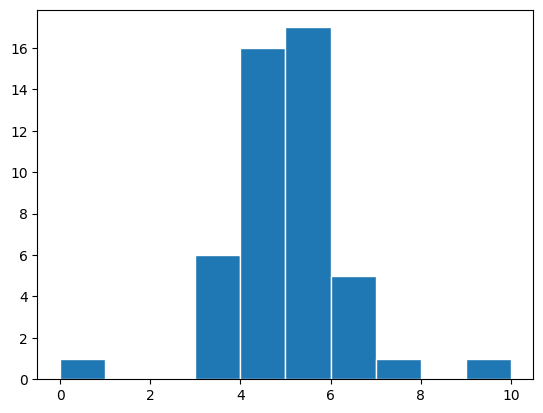

In [47]:
import matplotlib.pyplot as plt
plt.hist(norm(volatility_df['trans_score']), edgecolor = 'white')

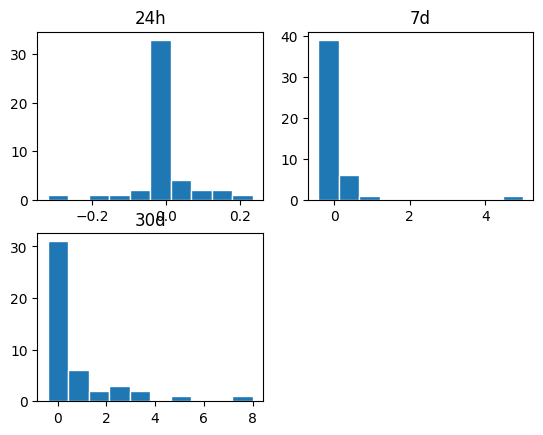

In [48]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.hist(metrics_df['floor_price_change_percentage.24h'], edgecolor = 'white')
plt.title('24h')
plt.subplot(222)
plt.hist(metrics_df['floor_price_change_percentage.7d'], edgecolor = 'white')
plt.title('7d')
plt.subplot(2, 2, 3)
plt.hist(metrics_df['floor_price_change_percentage.30d'], edgecolor = 'white')
plt.title('30d')
plt.show()

# Liquidity

- **Formula**: Liquidity Score =$ 10 - \frac{\text{Average Liquidity}}{\text{Max liquidity threshold}} \times 10 $
- **Calculation**: Assuming a max liquidity threshold of 0.5 (for example), and average liquidity = $ \frac{0.0077 + 0.0399 + 0.1435}{3} \approx 0.0637 $
  - Liquidity Score = $ 10 - \frac{0.0637}{0.5} \times 10 = 8.73 $
  - Here we set the max threshold to 95th percentile of average liquidity
- **Score**: Approximately `8.73/10`
- **Trans_Score**: Applied quantile transformation to transform the data.


In [49]:
def cal_liquidity(liquidity_list,max_thre=10):
  #remove nan
  nan_mask = np.isnan(liquidity_list)
  liquidity_list = np.array(liquidity_list)[~nan_mask].tolist()
  avg_liquidity = np.mean([abs(s*100) for s in liquidity_list])
  liquidity_score = 10- (avg_liquidity / max_thre * 10)
  return avg_liquidity,liquidity_score

In [50]:
liquidity_df = metrics_df[['collection_name','liquidity.24h','liquidity.7d', 'liquidity.30d']]
liquidity_df['avg'] = np.zeros(50)
liquidity_df['score'] = np.zeros(50)
for i in range(liquidity_df.shape[0]):
  avg,score = cal_liquidity(liquidity_df.iloc[i,1:4].tolist())
  liquidity_df.iloc[i,4]=avg
  liquidity_df.iloc[i,5]=score
liquidity_df['norm_score'] = norm(liquidity_df['score'])*10
liquidity_df['adj_score']=[1 if i < 1 else 10 if i >= 10 else i for i in liquidity_df['score']]

from sklearn.preprocessing import PowerTransformer, QuantileTransformer
qt = QuantileTransformer(n_quantiles=40, output_distribution='normal')
array = np.array(liquidity_df['score']).reshape(-1, 1)
liquidity_df['trans_score'] = norm(qt.fit_transform(array))

liquidity_df


<ipython-input-50-ddcb51d03438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liquidity_df['avg'] = np.zeros(50)
<ipython-input-50-ddcb51d03438>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liquidity_df['score'] = np.zeros(50)
<ipython-input-50-ddcb51d03438>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,collection_name,liquidity.24h,liquidity.7d,liquidity.30d,avg,score,norm_score,adj_score,trans_score
0,CryptoPunks,6.063669e-04,0.002628,0.023850,0.902813,9.097187,97.265306,9.097187,5.654792
1,Bored Ape Yacht Club,4.200840e-03,0.038408,0.136027,5.954524,4.045476,81.963257,4.045476,4.720627
2,Art Blocks,1.398355e-03,0.004808,0.016600,0.760231,9.239769,97.697199,9.239769,5.717650
3,Mutant Ape Yacht Club,5.337439e-03,0.049269,0.180139,7.824823,2.175177,76.297970,2.175177,4.168189
4,Pudgy Penguins,1.170117e-02,0.057156,0.166179,7.834533,2.165467,76.268555,2.165467,4.124496
5,Azuki,1.500000e-02,0.059900,0.162200,7.903333,2.096667,76.060154,2.096667,4.012262
6,ENS: Ethereum Name Service,4.165568e-05,0.000557,0.001183,0.059384,9.940616,99.820122,9.940616,6.263328
7,Wrapped Cryptopunks,3.610108e-03,0.009627,0.049338,2.085840,7.914160,93.681818,7.914160,5.086059
8,The Sandbox,1.162572e-04,0.000675,0.003161,0.131758,9.868242,99.600894,9.868242,6.100543
9,The Captainz,3.000300e-03,0.017002,0.244824,8.827549,1.172451,73.260628,1.172451,3.781371


(array([ 1.,  0.,  1.,  6., 16., 18.,  5.,  0.,  0.,  3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

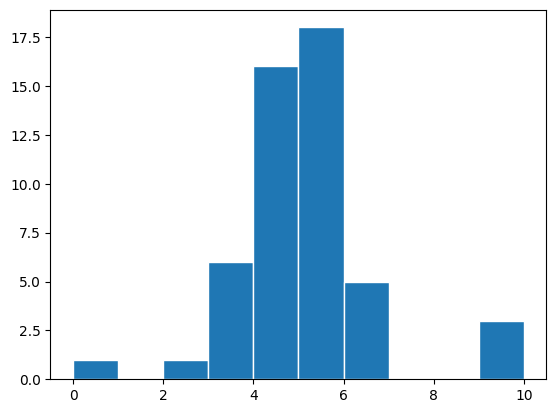

In [ ]:
plt.hist(liquidity_df['trans_score'], edgecolor = 'white')

In [ ]:
p = np.percentile(liquidity_df['score'][~np.isnan(liquidity_df['score'])], 95)
p

9.999345905532886


# Concentration Risk
- **Formula**: Concentration Risk Score = $ \frac{\text{Number of Holders}}{\text{Total Supply}} \times 10 $
- **Calculation**: $ \frac{5548}{10000} \times 10 = 5.548$
- **Score**: Approximately `5.55/10`
- **Normalized Score**: normalized the score to scale 0-10


In [ ]:
concentration_df = metrics_df[['collection_name','holder_num','total_supply']]
concentration_df['score'] = 10- (concentration_df['holder_num']/concentration_df['total_supply'] *10)
concentration_df['norm_score'] = norm(concentration_df['score'])
concentration_df

<ipython-input-49-3027db7efa47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concentration_df['score'] = 10- (concentration_df['holder_num']/concentration_df['total_supply'] *10)
<ipython-input-49-3027db7efa47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concentration_df['norm_score'] = norm(concentration_df['score'])*10


,collection_name,holder_num,total_supply,score,norm_score
0,CryptoPunks,3707,10000,6.293000,4.064483
1,Bored Ape Yacht Club,5546,10000,4.454000,1.113601
2,Art Blocks,42616,232876,8.170013,7.076362
3,Mutant Ape Yacht Club,11352,19486,4.174279,0.664757
4,Azuki,4197,10000,5.803000,3.278223
5,Pudgy Penguins,4417,8888,5.030378,2.038464
6,Wrapped Cryptopunks,146,4371,9.665980,9.476810
7,The Sandbox,16239,223465,9.273309,8.846725
8,The Captainz,3987,9999,6.012601,3.614552
9,Neo Tokyo Citizens,359,2036,8.236739,7.183431


# Overall Risk Score
- **Formula**: Overall Risk Score = $ \frac{\text{Sum of all scores}}{\text{Number of categories}} $
- **Calculation**: $ \frac{2.34 + 8.73 + 5.55 + 1.78}{4} \approx 4.60 $
- **Overall Risk Score**: `4.60/10`

### Notes
- The overall risk score is a simple average. If certain factors are more important, consider using a weighted average.

In [ ]:
overall_df =pd.DataFrame({'volatility': volatility_df['trans_score'],'liquidity': liquidity_df['trans_score'],"concentration": concentration_df['norm_score']})
overall_df['overall'] = (overall_df['volatility']+ overall_df['liquidity']+overall_df['concentration'])/3
overall_df

,volatility,liquidity,concentration,overall
0,5.027620,5.646974,4.064483,4.913026
1,3.104633,4.533474,1.113601,2.917236
2,5.044810,5.733266,7.076362,5.951479
3,4.296484,3.899918,0.664757,2.953720
4,4.863693,4.402774,3.278223,4.181563
5,5.301986,4.508740,2.038464,3.949730
6,4.844644,5.140629,9.476810,6.487361
7,4.179602,6.112989,8.846725,6.379772
8,5.156444,3.754187,3.614552,4.175061
9,6.576351,5.009546,7.183431,6.256443


(array([4., 2., 5., 5., 4., 6., 4., 7., 7., 3.]),
 array([2.55242887, 2.99046026, 3.42849165, 3.86652303, 4.30455442,
        4.7425858 , 5.18061719, 5.61864857, 6.05667996, 6.49471135,
        6.93274273]),
 <BarContainer object of 10 artists>)

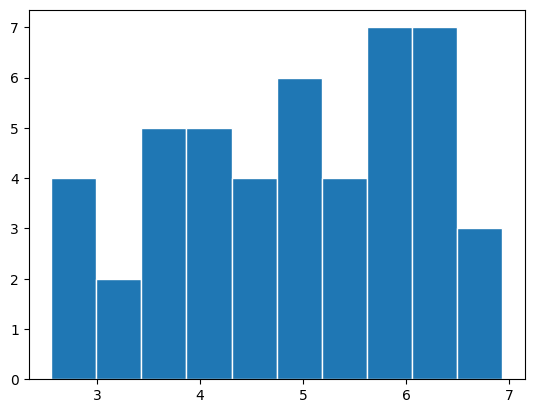

In [ ]:
plt.hist(overall_df['overall'], edgecolor = 'white')

Reference: https://docs.nftgo.io/docs/collection-metrics
The liquidity rate measures the relative liquidity of this collection.

Liquidity = Sales / The number of NFTs * 100%

For ERC1155:
- Token ID Liquidity = The number of sales of the token ID / The number of the token ID issued
- Collection Liquidity = ∑ The number of sales of the token ID / The number of all token IDs issued